In [4]:
import pandas as pd
import mysql.connector
from sqlalchemy import create_engine


In [ ]:
# Load CSV
df = pd.read_csv("C:/Users/91817/OneDrive/Desktop/Python Data Analytics/Etl pipeline project/sales_data.csv", encoding="latin1")

print("Raw Data Sample:")
df.head()


Raw Data Sample:


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [12]:
# Clean column names to snake_case
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Rename tricky columns for clarity
df.rename(columns={
    "quantityordered": "quantity_ordered",
    "priceeach": "price_each",
    "ordernumber": "order_number"
}, inplace=True)

# Now calculate revenue
df['revenue'] = df['sales'] * df['quantity_ordered']

print(df[['order_number', 'quantity_ordered', 'price_each', 'sales', 'revenue']].head())


   order_number  quantity_ordered  price_each    sales    revenue
0         10107                30       95.70  2871.00   86130.00
1         10121                34       81.35  2765.90   94040.60
2         10134                41       94.74  3884.34  159257.94
3         10145                45       83.26  3746.70  168601.50
4         10159                49      100.00  5205.27  255058.23


In [15]:
# MySQL connection details (replace with your credentials)
db_user = "root"
db_password = "Ankan81720#"
db_host = "localhost"
db_name = "etl_demo"

# Create SQLAlchemy engine
engine = create_engine(f"mysql+mysqlconnector://{db_user}:{db_password}@{db_host}/{db_name}")

# Load DataFrame into MySQL table
df.to_sql("sales", con=engine, if_exists="replace", index=False)

print("✅ Data loaded successfully into MySQL table: sales")


✅ Data loaded successfully into MySQL table: sales


In [16]:
query = """
SELECT country, SUM(revenue) AS total_revenue
FROM sales
GROUP BY country
ORDER BY total_revenue DESC
LIMIT 5;
"""

result = pd.read_sql(query, con=engine)
print("Top 5 Countries by Revenue:")
result


Top 5 Countries by Revenue:


,country,total_revenue
0,USA,1.388042e+08
1,Spain,4.746074e+07
2,France,4.281445e+07
3,Australia,2.296219e+07
4,UK,1.795804e+07


In [ ]:
# this is for the pipeline runs daily
import schedule
import time

def etl_job():
    print("Running ETL pipeline...")
    # etl_pipeline()
schedule.every().day.at("09:00").do(etl_job)

# for demo in interview
#-- schedule.every(10).seconds.do(etl_job)



while True:
    schedule.run_pending()
    time.sleep(1)


Running ETL pipeline...


KeyboardInterrupt: 

In [ ]:
# it shows after adding data it runs successfully or failure to add data
import logging

# Configure logging
logging.basicConfig(
    filename="etl_pipeline.log",
    level=logging.INFO,
    format="%(asctime)s - %(levelname)s - %(message)s"
)

logging.info("ETL Pipeline started")

try:
    # Extract step
    logging.info("Extracting data from CSV...")
    df = pd.read_csv("sales.csv")
    logging.info(f"Extracted {len(df)} rows")

    # Transform step
    logging.info("Transforming data...")
    df['revenue'] = df['sales'] * df['quantityordered']
    logging.info("Transformation successful")

    # Load step
    logging.info("Loading data into MySQL...")
    df.to_sql("sales", engine, if_exists="append", index=False)
    logging.info("Data loaded successfully")

except Exception as e:
    logging.error(f"ETL Pipeline failed: {str(e)}")


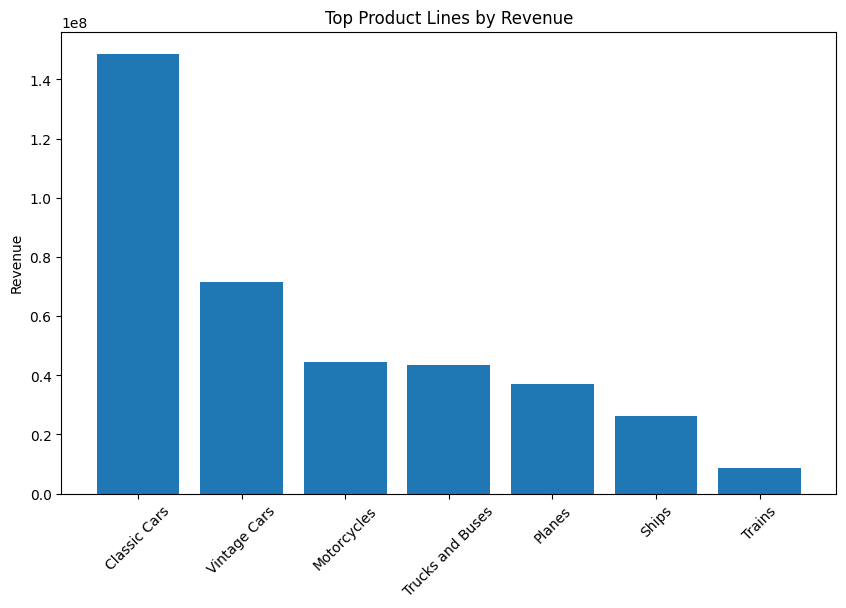

In [ ]:
# for basic visualization
import matplotlib.pyplot as plt

query = """
SELECT productline, SUM(revenue) AS total_revenue
FROM sales
GROUP BY productline
ORDER BY total_revenue DESC
"""
result = pd.read_sql(query, con=engine)

plt.figure(figsize=(10,6))
plt.bar(result['productline'], result['total_revenue'])
plt.xticks(rotation=45)
plt.title("Top Product Lines by Revenue")
plt.ylabel("Revenue")
plt.show()
